<a href="https://colab.research.google.com/github/chetna-santwani14/Zomato_Data_Analysis/blob/main/Zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df=pd.read_csv('/content/drive/MyDrive/Python_IITG_2025/Projectss/Zomato_Data_Analysis/zomato.csv')
df.sample(4)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
19135,https://www.zomato.com/bangalore/naachiyars-1-...,"36/1, Ground Floor, Haudin Road, Ulsoor, Banga...",Naachiyar's,Yes,No,3.9/5,117,+91 9663909611\r\n080 41738588,Ulsoor,Casual Dining,"Crab Soup, Raita, Kozhi Biryani, Mutton Biryani",Chettinad,600,"[('Rated 4.0', 'RATED\n Well this place has c...","['Boneless Naachiyars Special', 'Chicken Roast...",Dine-out,Indiranagar
27821,https://www.zomato.com/bangalore/naati-biriyan...,"Shop 15, Sree Mahadeshwara Plaza, BTM 1st Stag...",Naati Biriyani,No,No,3.1/5,4,+91 9606880622,BTM,Quick Bites,NaN,"Kebab, Biryani",300,[],[],Delivery,Koramangala 4th Block
37568,https://www.zomato.com/bangalore/sathyas-koram...,"147/D, 8th Main Road, 3rd Block, Koramangala 3...",Sathya's,No,Yes,4.1 /5,759,080 41317571,Koramangala 3rd Block,Bar,"Chicken Tikka, Egg Chilli, Masala Peanuts, Bee...","North Indian, Chinese","1,200","[('Rated 4.0', 'RATED\n The friendly neighbor...",[],Drinks & nightlife,Koramangala 7th Block
44174,https://www.zomato.com/bangalore/tandoori-deli...,"11/1, Opposite RMV Clusters Apartment, Lottego...",Tandoori Delight,Yes,No,3.0 /5,46,+91 9972183512\n+91 9035612005,New BEL Road,Quick Bites,NaN,"North Indian, Chinese",300,"[('Rated 5.0', 'RATED\n The best tandoori chi...","['Chilli Chicken', 'Chicken Lollipop', 'Chicke...",Delivery,New BEL Road


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [11]:
#df['menu_item'].value_counts()

In [12]:
df=df.drop(['address','phone','dish_liked','listed_in(city)','cuisines','menu_item','reviews_list'],axis=1)

In [13]:
df.sample(5)

,url,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type)
27254,https://www.zomato.com/bangalore/ghar-ka-bhoja...,Ghar Ka Bhojan,Yes,No,3.3/5,7,Domlur,Delivery,200,Delivery
28474,https://www.zomato.com/bangalore/1722-urban-bi...,1722 Urban Bistro,Yes,Yes,4.1 /5,222,Koramangala 5th Block,Casual Dining,600,Dine-out
50403,https://www.zomato.com/bangalore/ooty-chocolat...,Ooty Chocolates,Yes,No,3.6 /5,16,Whitefield,Dessert Parlor,300,Delivery
35431,https://www.zomato.com/bangalore/bubblewrap-wa...,Bubblewrap Waffle Co.,Yes,No,4.4 /5,362,Jayanagar,Dessert Parlor,400,Delivery
42793,https://www.zomato.com/bangalore/gundappa-donn...,Gundappa Donne Biryani,No,No,2.6 /5,91,Indiranagar,Quick Bites,300,Delivery


In [14]:
df['rate'].unique() # This should be floating number , and new and nan should not be there

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
float('4.1/5'.split('/')[0])

4.1

In [16]:
def cleaning_rate(value):
  if value=='NEW' or value=='-':
    return np.nan
  else :
    return float(str(value).split('/')[0])


In [17]:
cleaning_rate('3.2/5')

3.2

In [18]:
df['rate']=df['rate'].apply(cleaning_rate)
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [19]:
df.isna().sum() # checking the null values

,0
url,0
name,0
online_order,0
book_table,0
rate,10052
votes,0
location,21
rest_type,227
approx_cost(for two people),346
listed_in(type),0


In [20]:
df['rate']=df['rate'].fillna(np.round(df['rate'].mean(),1))

In [21]:
df.isna().sum()

,0
url,0
name,0
online_order,0
book_table,0
rate,0
votes,0
location,21
rest_type,227
approx_cost(for two people),346
listed_in(type),0


In [22]:
#in rate column , the null value is removed

In [23]:
df=df.dropna() #dropped nan vlaues

In [24]:
51717-51167

550

In [25]:
550/51717*100

1.0634800935862483

In [26]:
#only 1% of the data is droped , so thats not a big isssue , this can be done , but there , 20% of the vlaues would have be droped
# thats why we filled the nan values with the mean

In [27]:
#checking duplicates rows
df.duplicated().sum()

np.int64(0)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51167 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51167 non-null  object 
 1   name                         51167 non-null  object 
 2   online_order                 51167 non-null  object 
 3   book_table                   51167 non-null  object 
 4   rate                         51167 non-null  float64
 5   votes                        51167 non-null  int64  
 6   location                     51167 non-null  object 
 7   rest_type                    51167 non-null  object 
 8   approx_cost(for two people)  51167 non-null  object 
 9   listed_in(type)              51167 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.3+ MB


In [29]:
df['approx_cost(for two people)'].unique() # to chekc the type of values in the columns #astype() use krna possible nhi tha

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [30]:
def cleaned_cost(value):
  if ',' in value:
    value=value.replace(',','')
    return float(value)
  else:
    return float(value)

In [31]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(cleaned_cost)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51167 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51167 non-null  object 
 1   name                         51167 non-null  object 
 2   online_order                 51167 non-null  object 
 3   book_table                   51167 non-null  object 
 4   rate                         51167 non-null  float64
 5   votes                        51167 non-null  int64  
 6   location                     51167 non-null  object 
 7   rest_type                    51167 non-null  object 
 8   approx_cost(for two people)  51167 non-null  float64
 9   listed_in(type)              51167 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [32]:
# Mutlplie resturant types
restaurant_type=df['rest_type'].value_counts()

In [33]:
type_below_500=restaurant_type[restaurant_type<500]

In [34]:
def cleaned_type(value):
  if (value in type_below_500):
    return 'others'
  else :
    return value

In [35]:
df['rest_type']=df['rest_type'].apply(cleaned_type)
df['rest_type'].value_counts()

,count
rest_type,
Quick Bites,19048
Casual Dining,10275
others,6860
Cafe,3687
Delivery,2587
Dessert Parlor,2245
"Takeaway, Delivery",2016
Bakery,1141
"Casual Dining, Bar",1136


In [36]:
df['location'].value_counts()

,count
location,
BTM,5071
HSR,2496
Koramangala 5th Block,2481
JP Nagar,2219
Whitefield,2117
...,...
West Bangalore,6
Yelahanka,5
Jakkur,3


In [37]:
res_loc=df['location'].value_counts()
loc_below_200=res_loc[res_loc<200]

In [38]:
def cleaning_location(loc):
  if loc in loc_below_200:
    return 'Others'
  elif 'Koramangala' in loc :
    return 'Koramangala'
  else :
    return loc

In [39]:
df['location']=df['location'].apply(cleaning_location)
df['location'].value_counts()

,count
location,
Koramangala,7550
BTM,5071
Others,3412
HSR,2496
JP Nagar,2219
Whitefield,2117
Indiranagar,2033
Jayanagar,1916
Marathahalli,1811


# Restaurants delivering or not

Text(0.5, 1.0, 'Delievering or not')

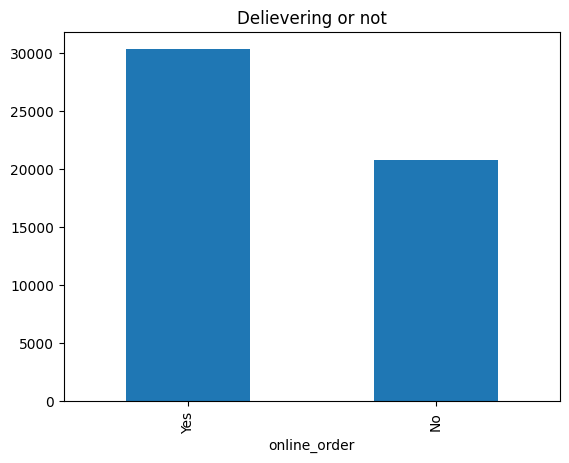

In [40]:
df['online_order'].value_counts().plot(kind='bar')
plt.title("Delievering or not")

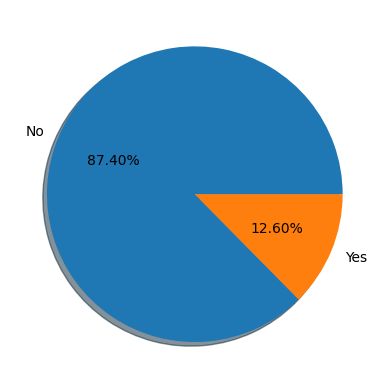

In [41]:
plt.pie(df['book_table'].value_counts().values,labels=df['book_table'].value_counts().index,autopct='%1.2f%%',shadow=True)
plt.show()

<Axes: xlabel='location'>

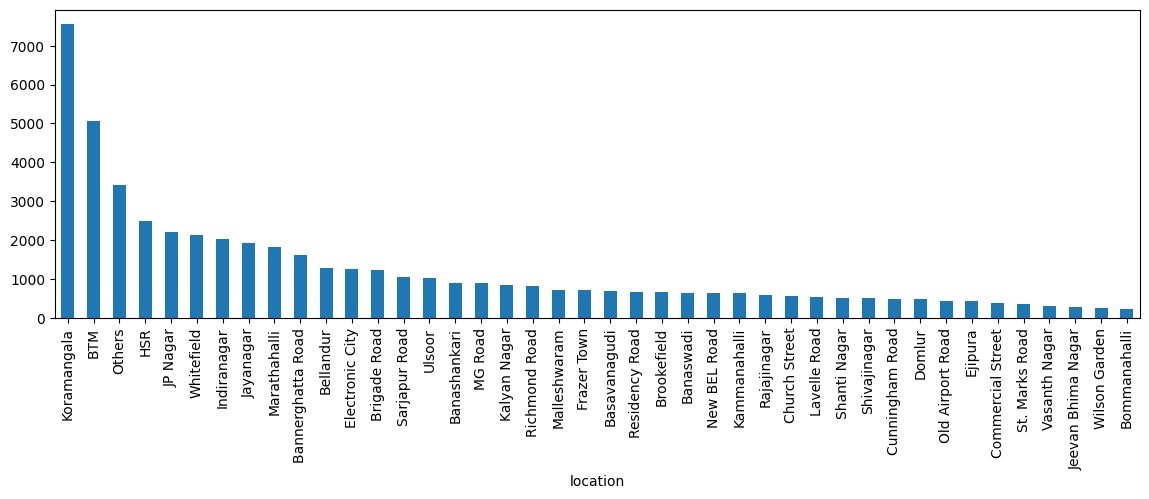

In [42]:
plt.figure(figsize=(14,4))
df['location'].value_counts().plot(kind='bar')

<Axes: ylabel='rest_type'>

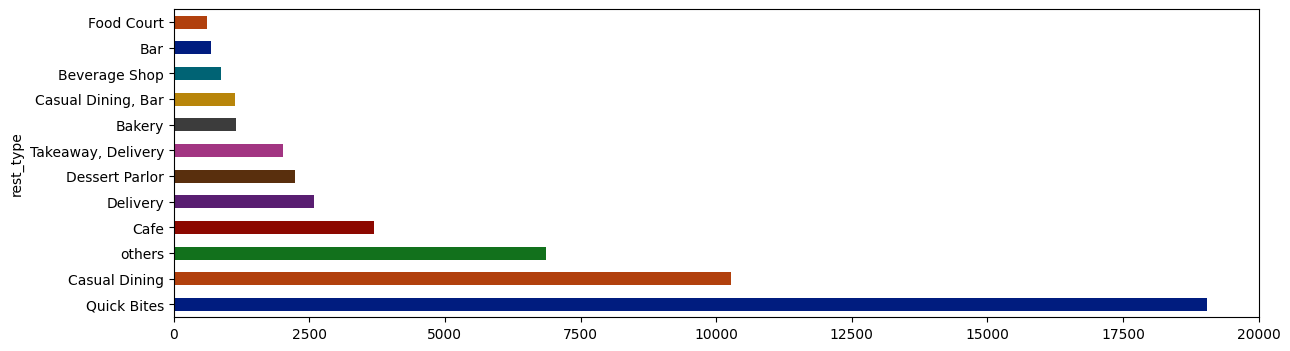

In [43]:
plt.figure(figsize=(14,4))
df['rest_type'].value_counts().plot(kind='barh',color=sns.color_palette('dark'))

In [44]:
res_cost=df['approx_cost(for two people)'].groupby(df['name'],sort=True)
dict1={}
for i ,j in df['name'].value_counts()[:10].to_dict().items():
  dict1[i]=np.round(res_cost.get_group(i).mean(),2)

In [45]:
dict1

{'Cafe Coffee Day': np.float64(844.79),
 'Onesta': np.float64(600.0),
 'Just Bake': np.float64(400.0),
 'Empire Restaurant': np.float64(685.21),
 'Five Star Chicken': np.float64(257.86),
 'Kanti Sweets': np.float64(400.0),
 'Petoo': np.float64(659.85),
 'Polar Bear': np.float64(361.54),
 'Baskin Robbins': np.float64(251.56),
 'Pizza Hut': np.float64(736.29)}

In [46]:
#now converting the dictionary into lists
list(dict1.items())

[('Cafe Coffee Day', np.float64(844.79)),
 ('Onesta', np.float64(600.0)),
 ('Just Bake', np.float64(400.0)),
 ('Empire Restaurant', np.float64(685.21)),
 ('Five Star Chicken', np.float64(257.86)),
 ('Kanti Sweets', np.float64(400.0)),
 ('Petoo', np.float64(659.85)),
 ('Polar Bear', np.float64(361.54)),
 ('Baskin Robbins', np.float64(251.56)),
 ('Pizza Hut', np.float64(736.29))]

In [47]:
#Now will convert this to dataframe
cost_df=pd.DataFrame(list(dict1.items()),columns=['Restaurant Name','Avg 2 people cost'])
cost_df

,Restaurant Name,Avg 2 people cost
0,Cafe Coffee Day,844.79
1,Onesta,600.00
2,Just Bake,400.00
3,Empire Restaurant,685.21
4,Five Star Chicken,257.86
5,Kanti Sweets,400.00
6,Petoo,659.85
7,Polar Bear,361.54
8,Baskin Robbins,251.56
9,Pizza Hut,736.29


Text(0.5, 1.0, 'Avg cost for 2 people-Top 10 restaurants')

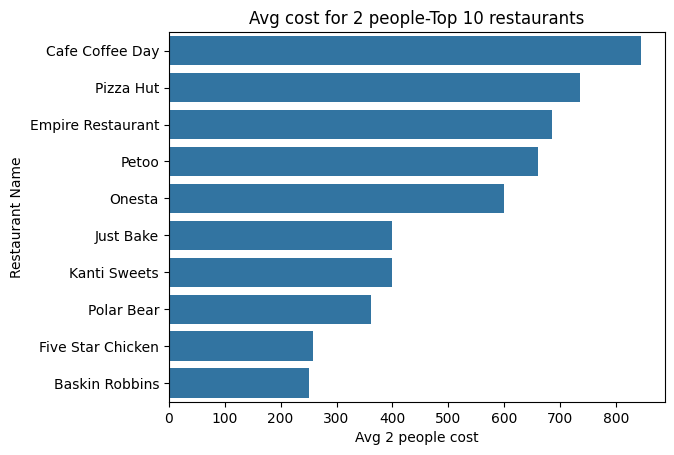

In [48]:
#Now ploting the bar graph using seaborn
sns.barplot(data=cost_df.sort_values(by=['Avg 2 people cost'],ascending=False),
            x='Avg 2 people cost',y='Restaurant Name')
plt.title('Avg cost for 2 people-Top 10 restaurants')


In [49]:
#Now doing the same for average ratings

In [50]:
res_chain=df['rate'].groupby(df['name'],sort=True)
dict2={}
for i ,j in df['name'].value_counts()[:10].to_dict().items():
  dict2[i]=np.round(res_chain.get_group(i).mean(),2)
cost_df2=pd.DataFrame(list(dict2.items()),columns=['Restaurant Name','Ratings'])

Text(0.5, 1.0, 'Avg Ratings -Top 10 restaurants')

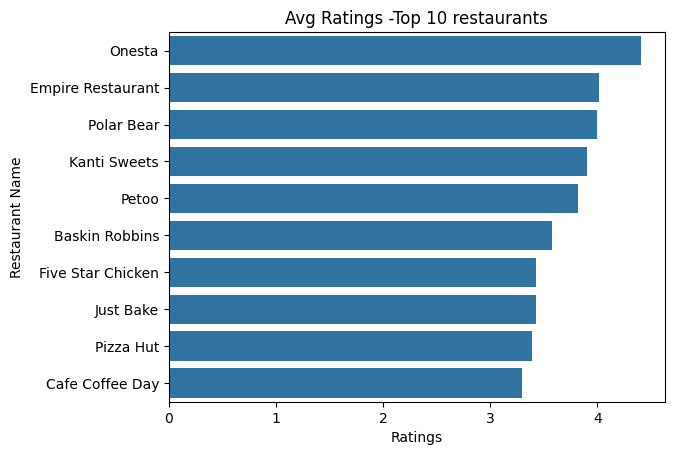

In [51]:
sns.barplot(data=cost_df2.sort_values(by=['Ratings'],ascending=False),
            x='Ratings',y='Restaurant Name')
plt.title('Avg Ratings -Top 10 restaurants')

In [52]:
df['name'].value_counts()[:10] #slices the first 10 rows

,count
name,
Cafe Coffee Day,96
Onesta,85
Just Bake,73
Empire Restaurant,71
Five Star Chicken,70
Kanti Sweets,68
Petoo,66
Polar Bear,65
Baskin Robbins,64


In [53]:
df['name'].value_counts()[:10].to_dict().items()

dict_items([('Cafe Coffee Day', 96), ('Onesta', 85), ('Just Bake', 73), ('Empire Restaurant', 71), ('Five Star Chicken', 70), ('Kanti Sweets', 68), ('Petoo', 66), ('Polar Bear', 65), ('Baskin Robbins', 64), ('Pizza Hut', 62)])

In [54]:
res_cost.get_group('Cafe Coffee Day')# here , we have 96 rows for CCD and now we will find the mean to know the approx-cost for 2 people

,approx_cost(for two people)
22,900.0
254,900.0
625,900.0
889,900.0
1186,900.0
...,...
49691,900.0
50119,650.0
50282,650.0
51004,900.0


In [55]:
res_cost.get_group('Cafe Coffee Day').mean()

np.float64(844.7916666666666)